In [1]:
                                  # movie rating prediction using python #

    
import pandas as pd
import numpy as npā
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [3]:
dataframe=pd.read_csv("codsoft dataset for task 2.csv", encoding='ISO-8859-1')

In [4]:
dataframe.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,-2021.0,90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,-2010.0,105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [5]:
def dataoveriew(dataframe, message):
    print(f'{message}:\n')
    print("Rows:", dataframe.shape[0])
    print("\nNumber of features:", dataframe.shape[1])
    print("\nFeatures:")
    print(dataframe.columns.tolist())
    print("\nMissing values:", dataframe.isnull().sum().values.sum())
    print("\nUnique values:")
    print(dataframe.nunique())

In [7]:
dataoveriew(dataframe, 'Overiew of the training dataset')

Overiew of the training dataset:

Rows: 15509

Number of features: 10

Features:
['Name', 'Year', 'Duration', '                    Genre', 'Rating', 'Votes', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']

Missing values: 33523

Unique values:
Name                         13838
Year                           102
Duration                       182
                    Genre      485
Rating                          84
Votes                         2034
Director                      5938
Actor 1                       4718
Actor 2                       4891
Actor 3                       4820
dtype: int64


In [9]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Name                       15509 non-null  object 
 1   Year                       14981 non-null  float64
 2   Duration                   7240 non-null   object 
 3                       Genre  13632 non-null  object 
 4   Rating                     7919 non-null   float64
 5   Votes                      7920 non-null   object 
 6   Director                   14984 non-null  object 
 7   Actor 1                    13892 non-null  object 
 8   Actor 2                    13125 non-null  object 
 9   Actor 3                    12365 non-null  object 
dtypes: float64(2), object(8)
memory usage: 1.2+ MB


In [17]:
print(dataframe.head())
if 'Genre' not in dataframe.columns:
    single_genre = 'Action' 
    dataframe['Genre'] = [single_genre] * len(dataframe)


                                 Name    Year Duration  \
0                                         NaN      NaN   
1  #Gadhvi (He thought he was Gandhi) -2019.0  109 min   
2                         #Homecoming -2021.0   90 min   
3                             #Yaaram -2019.0  110 min   
4                   ...And Once Again -2010.0  105 min   

                      Genre  Rating Votes            Director       Actor 1  \
0                     Drama     NaN   NaN       J.S. Randhawa      Manmauji   
1                     Drama     7.0     8       Gaurav Bakshi  Rasika Dugal   
2            Drama, Musical     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   
3           Comedy, Romance     4.4    35          Ovais Khan       Prateik   
4                     Drama     NaN   NaN        Amol Palekar  Rajat Kapoor   

              Actor 2          Actor 3   Genre  
0              Birbal  Rajendra Bhatia  Action  
1      Vivek Ghamande    Arvind Jangid  Action  
2   Plabita Borthakur       R

In [18]:
dataframe['Director'].value_counts()

Jayant Desai        58
Kanti Shah          57
Babubhai Mistry     50
Mahesh Bhatt        48
Master Bhagwan      47
                    ..
Naeem Siddiqui       1
Shadaab Khan         1
Mystelle Brabbee     1
Kunal Shivdasani     1
Kiran Thej           1
Name: Director, Length: 5938, dtype: int64

In [19]:
dataframe['Actor 1'].value_counts()

Ashok Kumar           158
Dharmendra            140
Jeetendra             140
Mithun Chakraborty    133
Amitabh Bachchan      129
                     ... 
Vatsal Sheth            1
Ujala Baboria           1
Dimple Sewak            1
Komal Leels             1
Sangeeta Tiwari         1
Name: Actor 1, Length: 4718, dtype: int64

In [21]:
dataframe.head(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Genre
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia,Action
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,Action
2,#Homecoming,-2021.0,90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana,Action
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,Action
4,...And Once Again,-2010.0,105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali,Action
5,...Aur Pyaar Ho Gaya,-1997.0,147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,Action
6,...Yahaan,-2005.0,142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,Action
7,.in for Motion,-2008.0,59 min,Documentary,NaN,NaN,Anirban Datta,NaN,NaN,NaN,Action
8,?: A Question Mark,-2012.0,82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,Action
9,@Andheri,-2014.0,116 min,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon,Action


In [22]:
dataframe.dropna(subset=['Name','Year','Duration','Votes','Rating'],inplace=True) 
dataframe.isna().sum()

Name                           0
Year                           0
Duration                       0
                    Genre     31
Rating                         0
Votes                          0
Director                       1
Actor 1                       75
Actor 2                      117
Actor 3                      163
Genre                          0
dtype: int64

In [23]:
dataframe.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Genre
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,Action
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,Action
5,...Aur Pyaar Ho Gaya,-1997.0,147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,Action
6,...Yahaan,-2005.0,142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,Action
8,?: A Question Mark,-2012.0,82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,Action


<Axes: xlabel='Votes'>

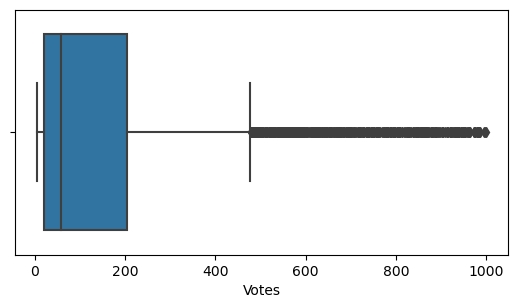

In [26]:


import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Convert 'Votes' column to numeric (assuming it contains numeric data)
dataframe['Votes'] = pd.to_numeric(dataframe['Votes'], errors='coerce')

# Create the boxplot
plt.figure(figsize=(14, 7))
plt.subplot(2, 2, 1)
sns.boxplot(x='Votes', data=dataframe)

# Add other subplots and customizations as needed


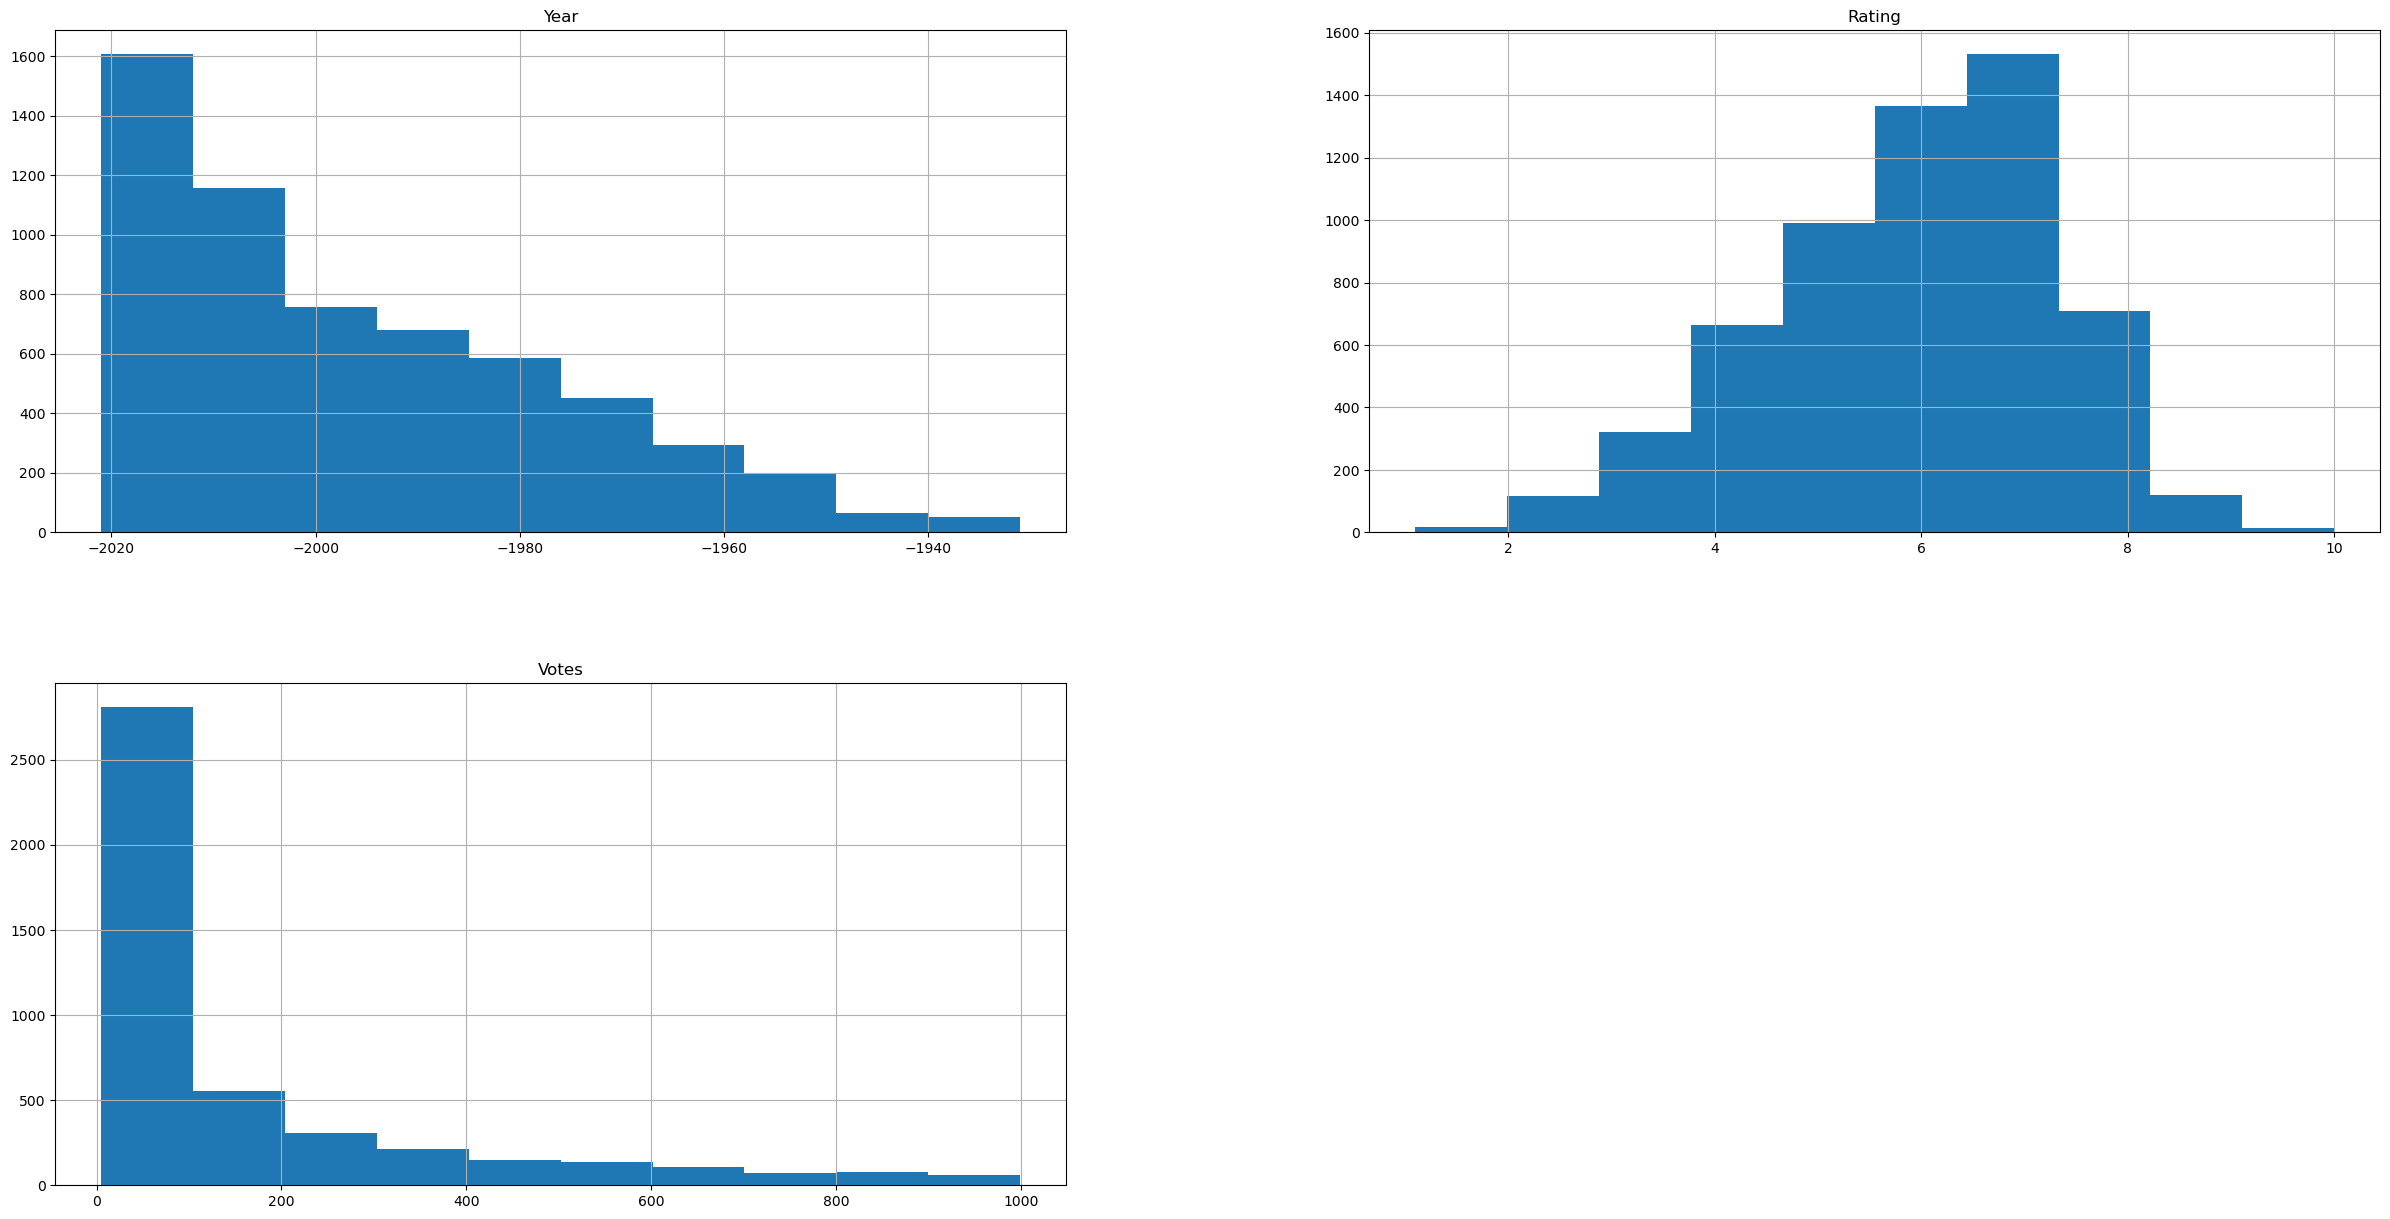

In [27]:
dataframe.hist(figsize=(30, 15))
None

C:\Users\Asus\AppData\Local\Temp\ipykernel_15672\557019578.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = dataframe.corr()


<function matplotlib.pyplot.show(close=None, block=None)>

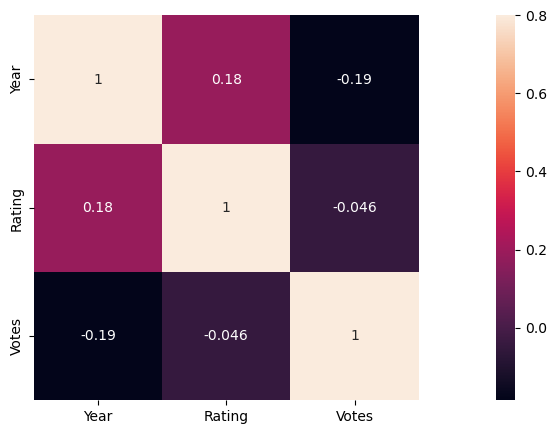

In [31]:
corrmat = dataframe.corr()
fig = plt.figure(figsize = (20, 5))

sns.heatmap(corrmat, vmax = .8, square = True, annot = True)
plt.show
